In [1]:
import numpy as np
np.random.seed(42)

import pandas as pd

import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import xgboost as xgb

In [2]:
df = pd.read_excel('preprocessed data.xlsx')


In [3]:
df.head()

,Unnamed: 0,sl.no.,0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence,tumor size,node status of the tumor,Age of the patient,tumor grade,A%-M,AI-M,A%-C,...,R%-C,U%-C,V%-C,W%-M,W%-C,ZA1%-M,ZA1%-C,ZB%-C,ZC%-C,ZD%-C
0,0,1,0,2,1,60,3,0,2.5,70,...,70,80,75,70,60,85,60,80,85,70
1,1,2,0,1,1,55,2,15,2.0,20,...,75,80,75,80,60,85,60,80,80,80
2,2,3,0,1,1,33,3,0,2.5,70,...,60,75,70,70,70,55,70,75,80,75
3,3,4,0,1,1,67,2,0,2.0,45,...,70,75,60,45,70,60,70,75,80,80
4,4,5,0,1,1,47,2,0,0.0,0,...,75,75,80,70,75,85,75,80,80,80


In [4]:
X_res = df.iloc[:,3:].values
y_res = df.iloc[:,2].values


In [5]:
from imblearn.over_sampling import RandomOverSampler

Using TensorFlow backend.


In [6]:
os = RandomOverSampler()
X_res,y_res = os.fit_sample(X_res,y_res)

In [7]:
y_res.shape

(382,)

In [8]:
X_res.shape

(382, 84)

In [9]:
df.describe()

,Unnamed: 0,sl.no.,0- Good Outcome/no recurrence\n1- Bad Outcome/recurrence,tumor size,node status of the tumor,Age of the patient,tumor grade,A%-M,AI-M,A%-C,...,R%-C,U%-C,V%-C,W%-M,W%-C,ZA1%-M,ZA1%-C,ZB%-C,ZC%-C,ZD%-C
count,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,...,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000,234.000000
mean,116.500000,117.500000,0.183761,1.944444,0.705128,48.974359,2.598291,6.581197,1.737179,29.102564,...,73.846154,75.320513,71.559829,69.401709,70.170940,74.615385,70.170940,72.264957,76.303419,74.914530
std,67.694165,67.694165,0.388119,0.525234,0.670193,10.551294,0.533188,17.617168,0.849354,30.409335,...,6.804587,6.232602,7.427955,10.454528,8.957018,6.457316,8.957018,8.491241,5.851326,5.913646
min,0.000000,1.000000,0.000000,1.000000,0.000000,25.000000,1.000000,0.000000,0.000000,0.000000,...,60.000000,55.000000,50.000000,40.000000,40.000000,55.000000,40.000000,50.000000,55.000000,55.000000
25%,58.250000,59.250000,0.000000,2.000000,0.000000,41.000000,2.000000,0.000000,1.500000,0.000000,...,70.000000,70.000000,70.000000,65.000000,65.000000,70.000000,65.000000,70.000000,71.250000,70.000000
50%,116.500000,117.500000,0.000000,2.000000,1.000000,49.000000,3.000000,0.000000,2.000000,20.000000,...,75.000000,75.000000,70.000000,70.000000,70.000000,75.000000,70.000000,70.000000,80.000000,75.000000
75%,174.750000,175.750000,0.000000,2.000000,1.000000,56.750000,3.000000,0.000000,2.000000,60.000000,...,80.000000,80.000000,75.000000,75.000000,78.750000,80.000000,78.750000,80.000000,80.000000,80.000000
max,233.000000,234.000000,1.000000,3.000000,3.000000,75.000000,3.000000,80.000000,3.000000,80.000000,...,90.000000,90.000000,90.000000,95.000000,85.000000,90.000000,85.000000,85.000000,90.000000,85.000000


In [10]:
# Principal component analysis
pca = PCA(n_components = 2)
pca_2d = pca.fit_transform(X_res)

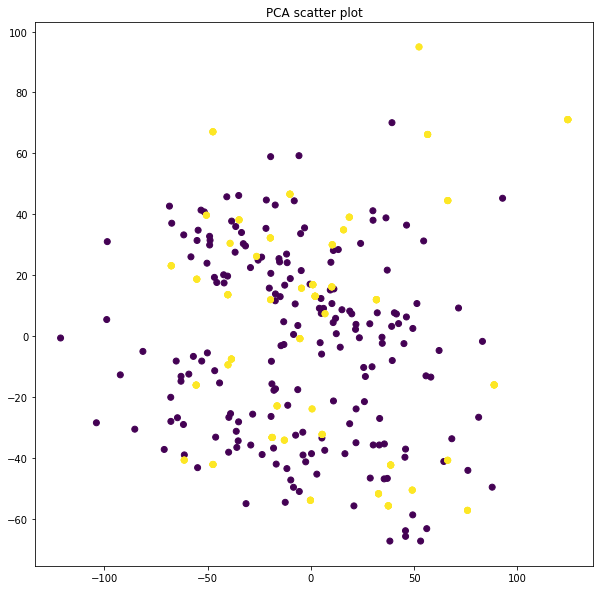

In [11]:
plt.figure(figsize = (10, 10))
plt.scatter(pca_2d[:,0], pca_2d[:,1], c = y_res)
plt.title('PCA scatter plot')
plt.show()

perplexity: 2
[t-SNE] Computing 7 nearest neighbors...
[t-SNE] Indexed 382 samples in 0.002s...
[t-SNE] Computed neighbors for 382 samples in 0.016s...
[t-SNE] Computed conditional probabilities for sample 382 / 382
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 70.039177
[t-SNE] KL divergence after 1000 iterations: 0.454547
perplexity: 5
[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 382 samples in 0.002s...
[t-SNE] Computed neighbors for 382 samples in 0.025s...
[t-SNE] Computed conditional probabilities for sample 382 / 382
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 71.998940
[t-SNE] KL divergence after 1000 iterations: 0.547072
perplexity: 10
[t-SNE] Computing 31 nearest neighbors...
[t-SNE] Indexed 382 samples in 0.001s...
[t-SNE] Computed neighbors for 382 samples in 0.024s...
[t-SNE] Computed conditional probabilities for sample 382 / 382
[t-SNE] Mean sigma: 30.2082

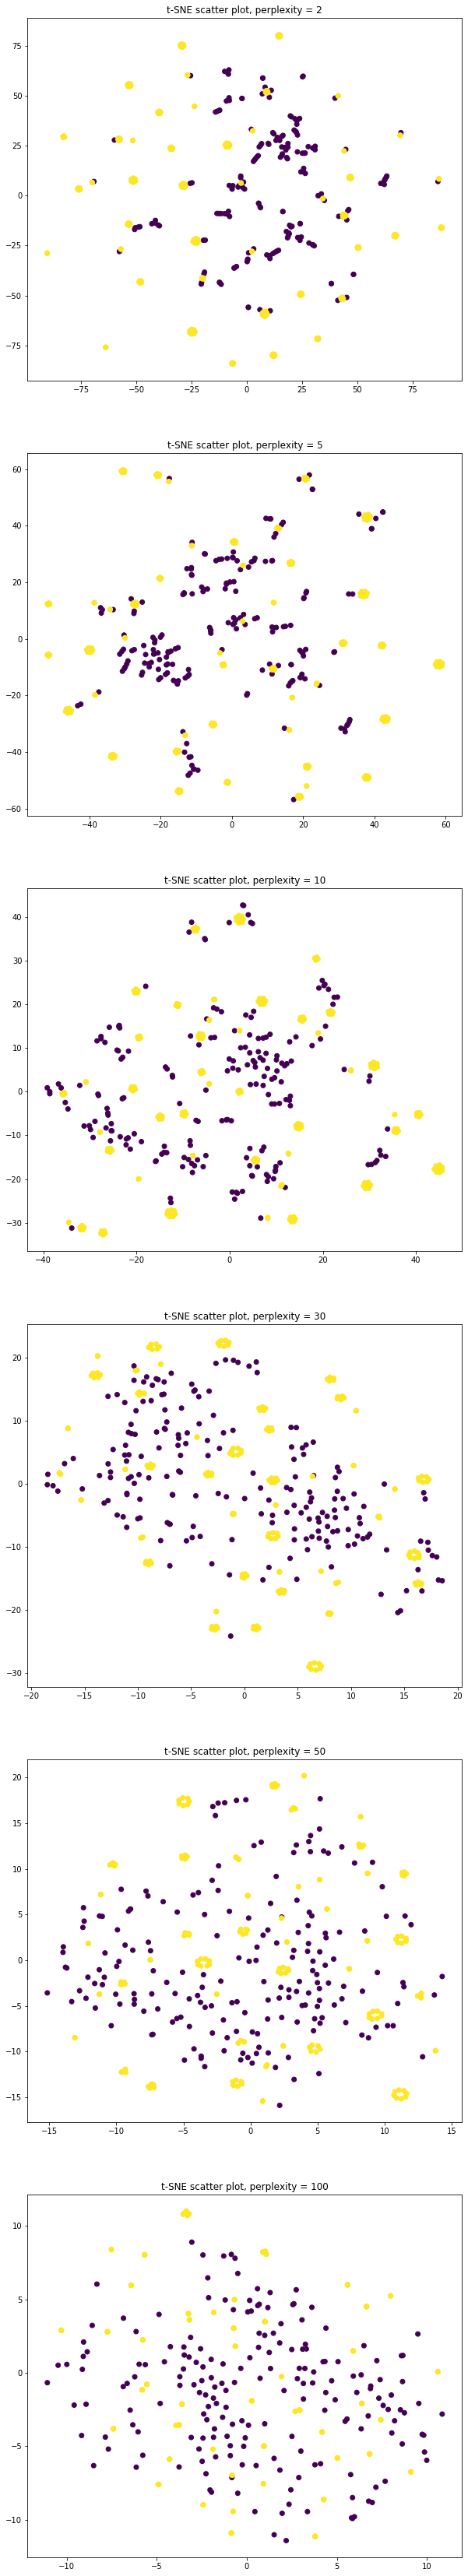

In [12]:
perplexities = (2, 5, 10, 30, 50, 100)
plt.figure(figsize = (10, 10*len(perplexities)))
for i, perplex in enumerate(perplexities):
    print('perplexity: {}'.format(perplex))
    tsne = TSNE(n_components = 2, perplexity = perplex, n_iter = 1000, verbose = 1)
    tsne_2d = tsne.fit_transform(X_res)
    
    plt.subplot(int('{}1{}'.format(len(perplexities), i+1)))
    plt.title('t-SNE scatter plot, perplexity = {}'.format(perplex))
    plt.scatter(tsne_2d[:,0], tsne_2d[:,1], c = y_res)
plt.show()

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size = 0.1, random_state = 0)


In [14]:
# Deep learning Keras stuff
from keras.models import Sequential
from keras.layers import Dense, Activation

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

model = Sequential()
model.add(Dense(32, input_dim = 84, init = 'uniform'))
model.add(Activation('relu'))
model.add(Dense(16, init = 'uniform'))
model.add(Activation('sigmoid'))
model.add(Dense(1, init = 'uniform'))

model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])
model.fit(scaler.transform(X_train), y_train, nb_epoch = 20, batch_size = 10)

/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(32, input_dim=84, kernel_initializer="uniform")`
  # This is added back by InteractiveShellApp.init_path()
/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(16, kernel_initializer="uniform")`
  del sys.path[0]
/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:15: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(1, kernel_initializer="uniform")`
  from ipykernel import kernelapp as app
/home/nitin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:18: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.


Epoch 1/20
343/343 [==============================] - 0s 328us/step - loss: 1.0693 - accuracy: 0.5073
Epoch 2/20
343/343 [==============================] - 0s 90us/step - loss: 0.7458 - accuracy: 0.5073
Epoch 3/20
343/343 [==============================] - 0s 79us/step - loss: 0.6536 - accuracy: 0.5598
Epoch 4/20
343/343 [==============================] - 0s 73us/step - loss: 0.6076 - accuracy: 0.7901
Epoch 5/20
343/343 [==============================] - 0s 78us/step - loss: 0.5783 - accuracy: 0.8163
Epoch 6/20
343/343 [==============================] - 0s 82us/step - loss: 0.5530 - accuracy: 0.8309
Epoch 7/20
343/343 [==============================] - 0s 75us/step - loss: 0.5288 - accuracy: 0.8746
Epoch 8/20
343/343 [==============================] - 0s 72us/step - loss: 0.5048 - accuracy: 0.8746
Epoch 9/20
343/343 [==============================] - 0s 86us/step - loss: 0.4780 - accuracy: 0.9067
Epoch 10/20
343/343 [==============================] - 0s 78us/step - loss: 0.4484 - accur

In [15]:
y_keras_pred = model.predict_classes(scaler.transform(X_test))
print('Accuracy: {}'.format(np.sum(y_keras_pred[:,0] == y_test) / float(len(y_test))))

Accuracy: 0.9487179487179487


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_keras_pred, y_test)
print(cm)

accuracy = (cm[0][0]+cm[1][1])/(cm[0][0]+cm[0][1]+cm[1][0]+cm[1][1])
print("Accuracy: "+ str(accuracy*100)+"%")

[[15  0]
 [ 2 22]]
Accuracy: 94.87179487179486%


In [24]:
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

print(accuracy_score(y_test,y_keras_pred))
print(confusion_matrix(y_test,y_keras_pred))
print(classification_report(y_test,y_keras_pred))

0.9487179487179487
[[15  2]
 [ 0 22]]
              precision    recall  f1-score   support

           0       1.00      0.88      0.94        17
           1       0.92      1.00      0.96        22

    accuracy                           0.95        39
   macro avg       0.96      0.94      0.95        39
weighted avg       0.95      0.95      0.95        39

